# Problem Statement
In this assignment students have to transform iris data into 3 dimensions and plot a 3d chart with transformed dimensions and color each data point with specific class.

#### Import libraries into working environment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
import seaborn as sns
from sklearn.decomposition import PCA


#### Load iris data set 

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
print("Number of samples:")

print(X.shape[0])
print('---------------------------------------------------------------------------')
print('Number of features :')
print(X.shape[1])
print('---------------------------------------------------------------------------')
print("Feature names:")
print('---------------------------------------------------------------------------')
print(iris.feature_names)


Number of samples:
150
---------------------------------------------------------------------------
Number of features :
4
---------------------------------------------------------------------------
Feature names:
---------------------------------------------------------------------------
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


#### Feature scaling prior to applying PCA

In [3]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
print('shape of scaled data points:')
print('---------------------------------------------------------------------------')
print(X_scaled.shape)
print('first 5 rows of scaled data points :')
print('---------------------------------------------------------------------------')
print(X_scaled[:5,:])

shape of scaled data points:
---------------------------------------------------------------------------
(150, 4)
first 5 rows of scaled data points :
---------------------------------------------------------------------------
[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]


#### looking at the explained variance as a function of the components


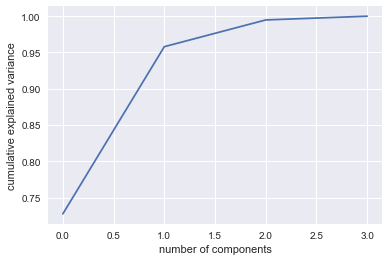

In [4]:
sns.set()
pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Note
Here we see that we'd need about 3 components to retain 100% of the variance. 
Looking at this plot for a high-dimensional dataset can help us understand the level of redundancy present in multiple observations.

#### PCA using Eigen-decomposition: 5-step process

In [5]:
# 1. Normalize columns of A so that each feature has zero mean
A0 = iris.data
mu = np.mean(A0,axis=0)
A = A0 - mu
print("Does A have zero mean across rows?")
print(np.mean(A,axis=0))
print('--------------------------------------------------------------------------')
print('Mean value : ')
print('--------------------------------------------------------------------------')
print(mu)
print('Standardized Feature value first 5 rows: ')
print('--------------------------------------------------------------------------')
print(A[:5,:])

# 2. Compute sample covariance matrix Sigma = {A^TA}/{(m-1)}
#covariance matrix can also be computed using np.cov(A.T)
m,n = A.shape
Sigma = (A.T @ A)/(m-1)
print("--------------------------------------------------------------------------")
print("Sigma:")
print(Sigma)

# 3. Perform eigen-decomposition of Sigma using `np.linalg.eig(Sigma)`
W,V = np.linalg.eig(Sigma)
print("---------------------------------------------------------------------------")
print("Eigen values:")
print(W)
print("---------------------------------------------------------------------------")
print("Eigen vectors:")
print(V)

# 4. Compress by ordering 3 eigen vectors according to largest eigen values and compute AX_k
print("----------------------------------------------------------------------------")
print("Compressed - 4D to 3D:")
print("----------------------------------------------------------------------------")
print('First 3 eigen vectors :')
print(V[:,:3] )
print("----------------------------------------------------------------------------")
Acomp = A @ V[:,:3] 
print('First first five rows of transformed features :')
print("----------------------------------------------------------------------------")
print(Acomp[:5,:]) 


# 5. Reconstruct from compressed version by computing $A V_k V_k^T$
print("----------------------------------------------------------------------------")
print("Reconstructed version - 3D to 4D:")
print("----------------------------------------------------------------------------")
Arec = A @ V[:,:3] @ V[:,:3].T # first 3 evectors
print(Arec[:5,:]+mu) # first 5 obs, adding mu to compare to original


Does A have zero mean across rows?
[-1.12502600e-15 -6.75015599e-16 -3.23889064e-15 -6.06921920e-16]
--------------------------------------------------------------------------
Mean value : 
--------------------------------------------------------------------------
[5.84333333 3.054      3.75866667 1.19866667]
Standardized Feature value first 5 rows: 
--------------------------------------------------------------------------
[[-0.74333333  0.446      -2.35866667 -0.99866667]
 [-0.94333333 -0.054      -2.35866667 -0.99866667]
 [-1.14333333  0.146      -2.45866667 -0.99866667]
 [-1.24333333  0.046      -2.25866667 -0.99866667]
 [-0.84333333  0.546      -2.35866667 -0.99866667]]
--------------------------------------------------------------------------
Sigma:
[[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]
-----------------------------

#### Original iris feature values

In [6]:
iris.data[:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

#### 3D Visualization

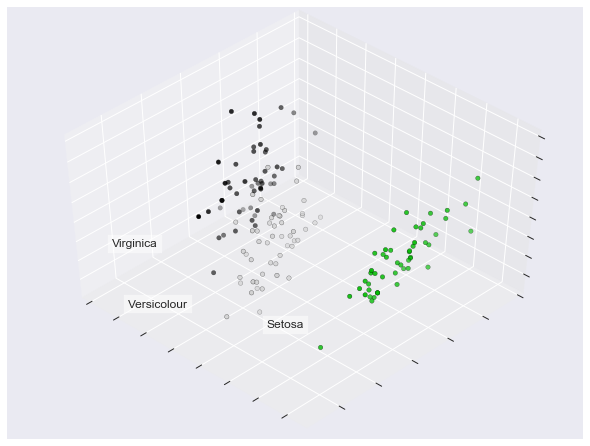

In [7]:
np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=48, azim=134)
y= iris.target
plt.cla()
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(Acomp[y == label, 0].mean(),
              Acomp[y == label, 1].mean() + 1.5,
              Acomp[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(Acomp[:, 0], Acomp[:, 1], Acomp[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

#### Applying PCA for number of compents = 3 using sklearn

In [8]:
pca = PCA(n_components=3)
pca.fit(X_scaled)
print('explained variance :')
print('--------------------------------------------------------------------')
print(pca.explained_variance_)
print('--------------------------------------------------------------------')
print('PCA Components : ')
print('--------------------------------------------------------------------')
print(pca.components_)
print('--------------------------------------------------------------------')
X_transformed = pca.transform(X)
print('Transformed Feature values first five rows :')
print('--------------------------------------------------------------------')
print(X_transformed[:5,:])
print('--------------------------------------------------------------------')
print('Transformed Feature shape :')
print('--------------------------------------------------------------------')
print(X_transformed.shape)
print('--------------------------------------------------------------------')
print('Original Feature shape :')
print('--------------------------------------------------------------------')
print(X.shape)
print('--------------------------------------------------------------------')
print('Retransformed  Feature  :')
print('--------------------------------------------------------------------')
X_retransformed = pca.inverse_transform(X_transformed)
print('Retransformed Feature values first five rows :')
print('--------------------------------------------------------------------')
print(X_retransformed[:5,:])

explained variance :
--------------------------------------------------------------------
[2.93035378 0.92740362 0.14834223]
--------------------------------------------------------------------
PCA Components : 
--------------------------------------------------------------------
[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]
 [-0.72101681  0.24203288  0.14089226  0.6338014 ]]
--------------------------------------------------------------------
Transformed Feature values first five rows :
--------------------------------------------------------------------
[[ 2.66923088  5.18088722 -2.50606121]
 [ 2.69643401  4.6436453  -2.48287429]
 [ 2.4811633   4.75218345 -2.30435358]
 [ 2.57151243  4.62661492 -2.22827673]
 [ 2.59065822  5.23621104 -2.40975624]]
--------------------------------------------------------------------
Transformed Feature shape :
--------------------------------------------------------------------
(150, 3)
-----------

#### Note :
Transformed from 4D to 3D using PCA

In [9]:
print('First Principal Component PC1: ',pca.components_[0])
print('\nSecond Principal Component PC2: ',pca.components_[1])
print('\nThird Principal Component PC3: ',pca.components_[2])

First Principal Component PC1:  [ 0.52237162 -0.26335492  0.58125401  0.56561105]

Second Principal Component PC2:  [0.37231836 0.92555649 0.02109478 0.06541577]

Third Principal Component PC3:  [-0.72101681  0.24203288  0.14089226  0.6338014 ]


#### Note:
Transforming from 3D to 4D

#### 3D visualization

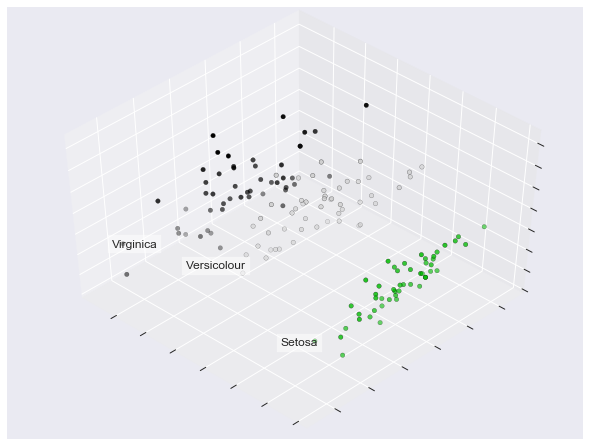

In [10]:

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=48, azim=134)
y= iris.target
plt.cla()
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X_transformed[y == label, 0].mean(),
              X_transformed[y == label, 1].mean() + 1.5,
              X_transformed[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X_transformed[:, 0], X_transformed[:, 1], X_transformed[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()